In [31]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

print (tf.__version__) # 1.12.0

2.12.0


### Loading the fashion MNIST data 

In [32]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data

In [33]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


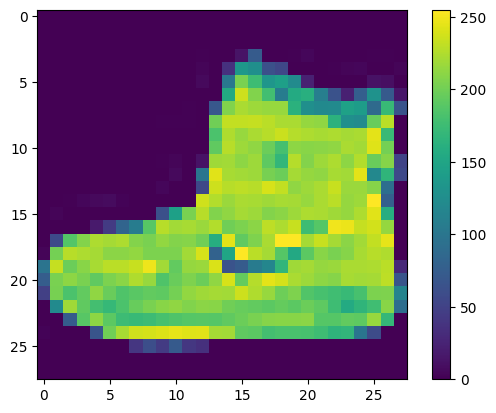

In [34]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data 

In [35]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

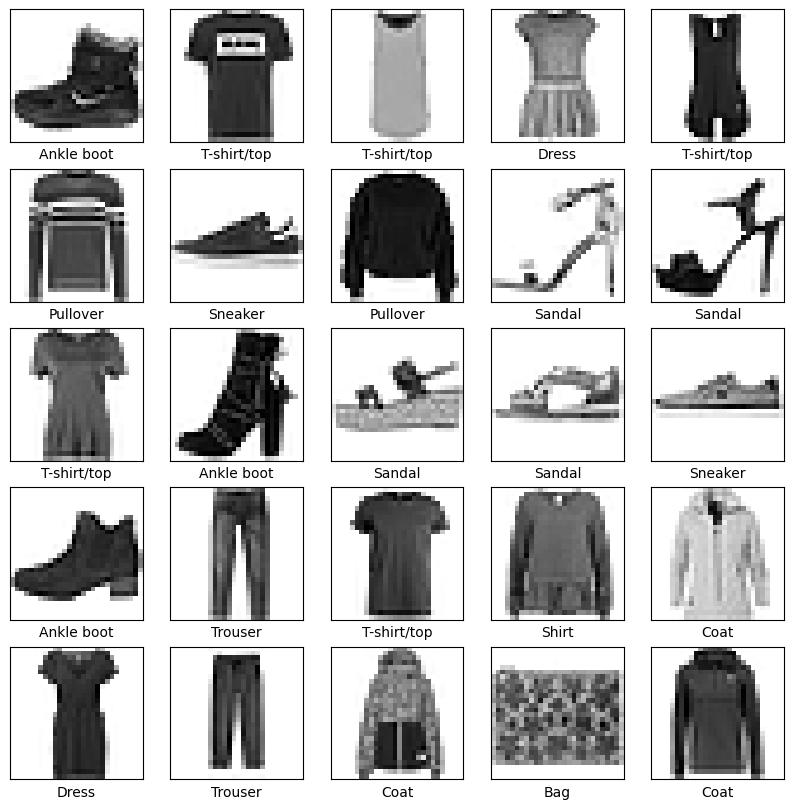

In [36]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

In [37]:
# Model a simple 12-layer neural network 
drop = 0.1
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(128, activation=tf.nn.relu),
    Dropout(drop),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model_12.summary() 
model_12.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25)

In [39]:
# NN-12, 50 epochs 
history_NN12_50=model_12.fit(train_images, train_labels, epochs=300, callbacks=[early_stopping], validation_split=0.2)

test_loss, test_acc = model_12.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)


Epoch 1/300
1500/1500 [==============================] - 15s 9ms/step - loss: 0.8073 - accuracy: 0.6815 - val_loss: 0.5834 - val_accuracy: 0.7977
Epoch 2/300
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5441 - accuracy: 0.8071 - val_loss: 0.4554 - val_accuracy: 0.8338
Epoch 3/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4954 - accuracy: 0.8288 - val_loss: 0.4196 - val_accuracy: 0.8496
Epoch 4/300
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4616 - accuracy: 0.8416 - val_loss: 0.4133 - val_accuracy: 0.8530
Epoch 5/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4470 - accuracy: 0.8474 - val_loss: 0.4006 - val_accuracy: 0.8614
Epoch 6/300
1500/1500 [==============================] - 13s 8ms/step - loss: 0.4252 - accuracy: 0.8528 - val_loss: 0.4305 - val_accuracy: 0.8545
Epoch 7/300
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4110 - accuracy: 0.8582 - val_loss: 0.3798 -

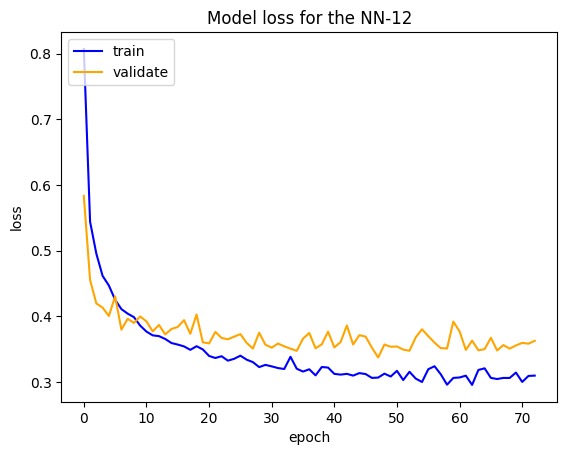

In [40]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_50.history['loss'], 'blue')
plt.plot(history_NN12_50.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


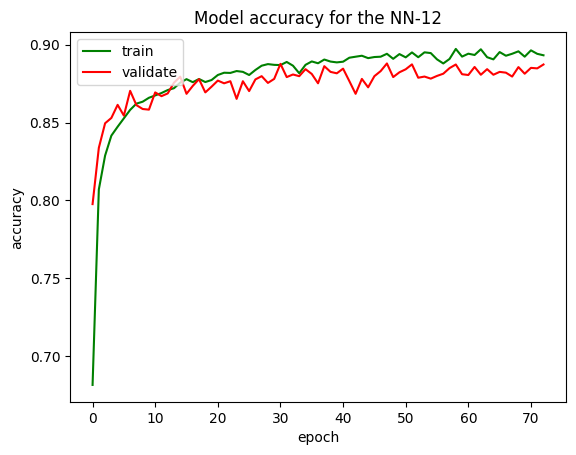

In [41]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN12_50.history['accuracy'], 'green')
plt.plot(history_NN12_50.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-12')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [42]:
predictions = model_12.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<ipython-input-44-ecd87b3899cf>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


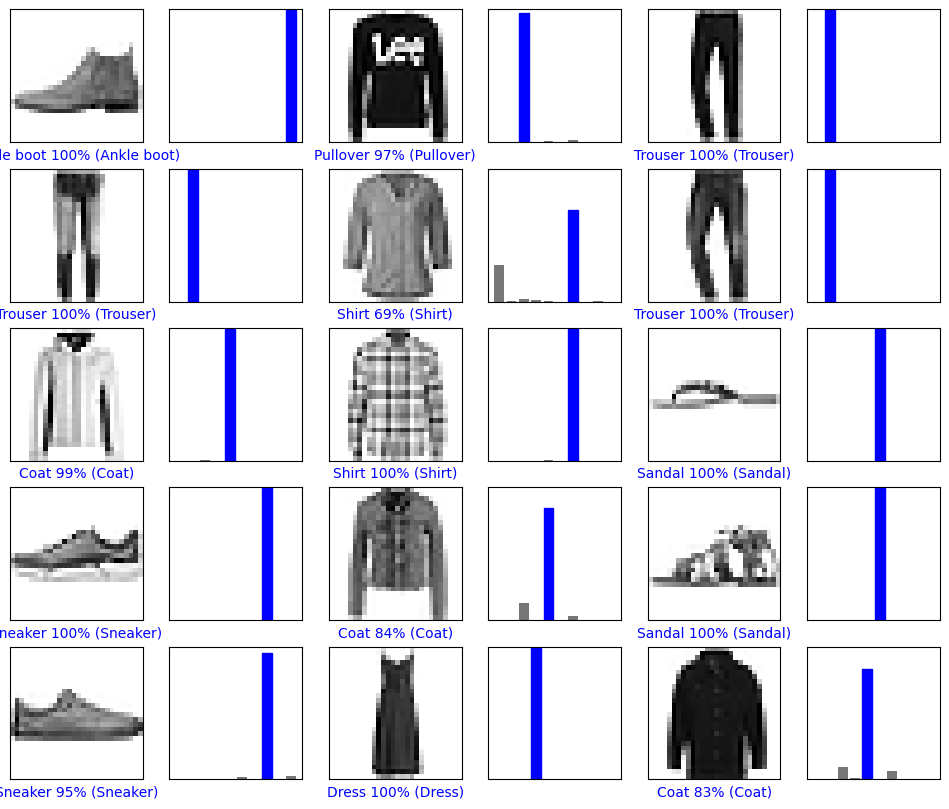

In [44]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    

In [45]:

# One-hot encode target variable if it is a multiclass problem
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(train_labels)
y_test_encoded = encoder.transform(test_labels)

y_pred = model_12.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.86      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.82      0.75      0.79      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.71      0.66      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [46]:
model_12.save_weights('model_12_weights.h5')

In [47]:
# Model a simple 12-layer neural network 

model_12_new = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_12_new.summary() 
model_12_new.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 128)              

In [48]:
model_12_new.load_weights('model_12_weights.h5')

In [49]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=25)

In [51]:
# NN-12, 50 epochs 
history_NN12_new=model_12_new.fit(train_images, train_labels, epochs=300, callbacks=[early_stopping], validation_split=0.2)

test_loss, test_acc = model_12_new.evaluate(test_images, test_labels)
print("Model - 12 new layers - test loss:", test_loss * 100)
print("Model - 12 new layers - test accuracy:", test_acc * 100)


Epoch 1/300
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2625 - accuracy: 0.9103 - val_loss: 0.4520 - val_accuracy: 0.8849
Epoch 2/300
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2475 - accuracy: 0.9114 - val_loss: 0.4299 - val_accuracy: 0.8803
Epoch 3/300
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2473 - accuracy: 0.9117 - val_loss: 0.4412 - val_accuracy: 0.8848
Epoch 4/300
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2590 - accuracy: 0.9138 - val_loss: 0.4292 - val_accuracy: 0.8809
Epoch 5/300
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2295 - accuracy: 0.9162 - val_loss: 0.4484 - val_accuracy: 0.8873
Epoch 6/300
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2575 - accuracy: 0.9084 - val_loss: 0.4296 - val_accuracy: 0.8822
Epoch 7/300
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2336 - accuracy: 0.9164 - val_loss: 0.4398 -

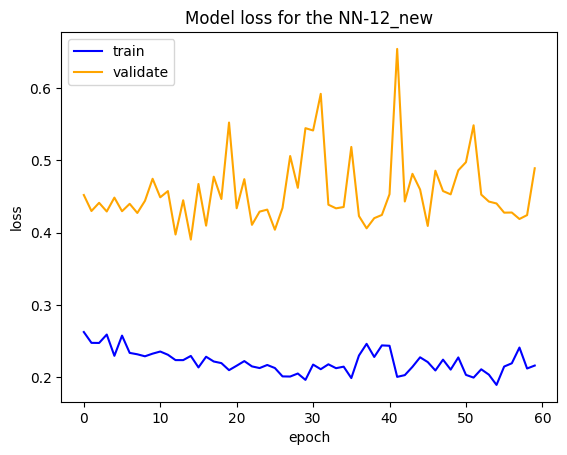

In [52]:
#Plot loss results for training data and testing data
plt.plot(history_NN12_new.history['loss'], 'blue')
plt.plot(history_NN12_new.history['val_loss'], 'orange')
plt.title('Model loss for the NN-12_new')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


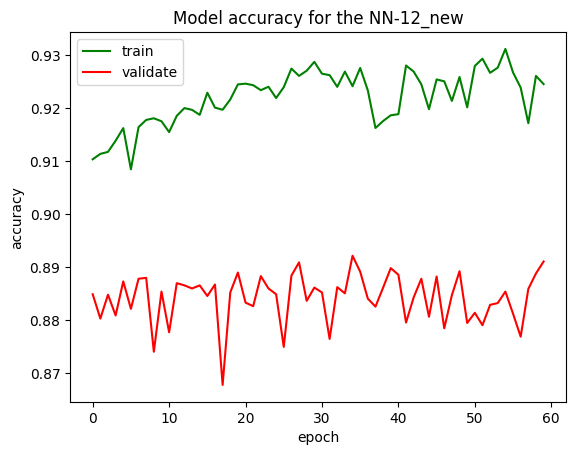

In [53]:
#Plot accuracy results for training data and testing data 
plt.plot(history_NN12_new.history['accuracy'], 'green')
plt.plot(history_NN12_new.history['val_accuracy'], 'red')
plt.title('Model accuracy for the NN-12_new')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [54]:
predictions = model_12_new.predict(test_images)

313/313 [==============================] - 1s 2ms/step


<ipython-input-55-ecd87b3899cf>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


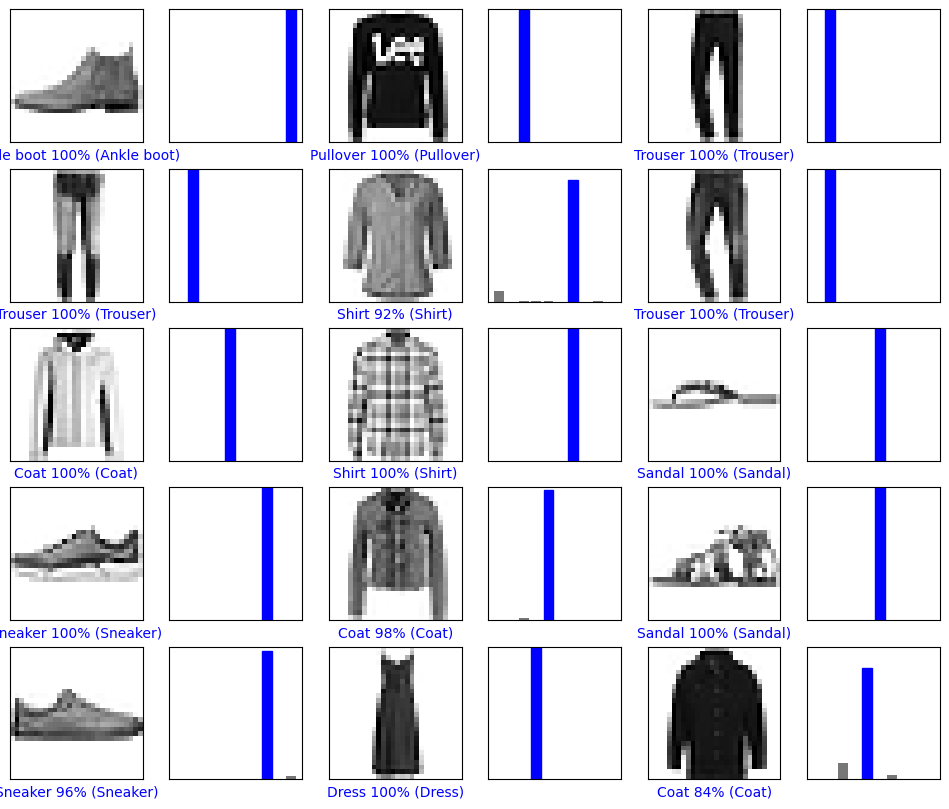

In [55]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    

In [57]:

# One-hot encode target variable if it is a multiclass problem
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(train_labels)
y_test_encoded = encoder.transform(test_labels)

y_pred = model_12_new.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.81      0.78      0.80      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.81      0.79      0.80      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.67      0.71      0.69      1000
     Sneaker       0.90      0.98      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

